In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
pd.set_option('display.max_rows', df.shape[0]+1)
# pd.set_option('display.max_rows', 10)

NameError: name 'df' is not defined

In [414]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col=0)
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv', index_col=0)

In [415]:
print(train_data.shape)
train_data.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [416]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Removing missing values

In [417]:
train_data[train_data.FireplaceQu.notnull()]["SalePrice"].describe()

count       770.000000
mean     216397.692208
std       86843.901262
min       60000.000000
25%      159000.000000
50%      191000.000000
75%      257375.000000
max      755000.000000
Name: SalePrice, dtype: float64

### First, let's remove variables with most of the values missing

In [961]:
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

In [962]:
df = pd.concat([X , test_data])
# df = df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis=1)

In [963]:
df.shape

(2919, 79)

## Then let's remove missing values

In [964]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isnull().sum().sort_values(ascending=False))

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
SaleType            1
BsmtFinSF1          1
KitchenQual         1
GarageCars          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
BsmtFinSF2          1
TotRmsAbvGrd        0
Fireplaces          0
MSSubClass          0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

## Numerical values

In [965]:
numerical = list( df.loc[:,df.dtypes != 'object'].columns.values )
categorical = list( df.loc[:,df.dtypes == 'object'].columns.values )

In [966]:
missing_num = df[numerical].isnull().sum()
missing_num = missing_num[missing_num > 0]
missing_num.sort_values()

BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
BsmtFullBath      2
BsmtHalfBath      2
MasVnrArea       23
GarageYrBlt     159
LotFrontage     486
dtype: int64

In [967]:
x = [1000, 2000, 4000, 10000, 25000, 50000, 500000]

df['LotFrontage'] = df.groupby(pd.cut(df['LotArea'], x))['LotFrontage'].apply(lambda x: x.fillna(x.median()))

# df.groupby(pd.cut(df['LotArea'], x))['LotFrontage'].median()

# numerical.remove("LotFrontage")
for feature in numerical:
    df[feature] = df[feature].fillna(0)

### Categorical values

In [968]:
missing_cat = df[categorical].isnull().sum()
missing_cat = missing_cat[missing_cat > 0]
missing_cat.sort_values()

Electrical         1
KitchenQual        1
Exterior2nd        1
SaleType           1
Exterior1st        1
Utilities          2
Functional         2
MSZoning           4
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
FireplaceQu     1420
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

In [969]:
cat_exclude = ['MasVnrType', "MSZoning", "Functional", "Utilities", "Exterior1st", "SaleType", "Exterior2nd", "KitchenQual", "Electrical"]
for feature in missing_cat.drop(cat_exclude).index:
    df[feature] = df[feature].fillna("NA")

In [970]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [971]:
df['MasVnrType'] = df.FireplaceQu.fillna("None")
cat_exclude.remove("MasVnrType")

In [972]:
df[cat_exclude] = df.groupby('Neighborhood')[cat_exclude].transform(lambda x: x.fillna(x.mode()[0]))   

In [973]:
df[df.isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,


## Change categories to numbers

In [974]:
df.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [975]:
rate_0 = ['NA', 'None']
rate_1 = ['C (all)', 'Grvl', 'Reg', 'Low', 'ELO', 'Inside','Sev', 'Po', 'No', 'Unf', 'Sev', 'MnWw']
rate_2 = ['FV', 'Pave', 'IR1', 'HLS', 'NoSeWa','Corner','Mod', 'Fa', 'Mn','LwQ', 'Maj2', 'RFn', 'GdWo']
rate_3 = ['RH', 'IR2', 'Bnk', 'NoSewr','CulDSac','Gtl', 'TA', 'Av', 'Rec', 'Maj1', 'Fin', 'MnPrv']
rate_4 = ['RM', 'IR3', 'Lvl', 'AllPub','FR2', 'Gd', 'BLQ', 'Mod', 'GdPrv']
rate_5 = ['RL','FR3','Ex','ALQ', 'Min2']
rate_6 = ['GLQ', 'Min1']
rate_7 = ['Typ']

rate = [rate_0, rate_1, rate_2, rate_3, rate_4, rate_5, rate_6, rate_7]

# Given a categorical value [cat], return [i] such that [cat \in rate_i]
def cat_to_int(cat): 
    return next(filter(lambda rate_i : cat in rate_i[1], enumerate(rate)))[0] 

# List of all categorical values
flat_rate = sum(rate, [])

# Generate the dictionary
replace_dictionary = dict( map(lambda cat: (cat, cat_to_int(cat)), flat_rate ) )

In [976]:
df[categorical] = df[categorical].replace(replace_dictionary)

## Let's add new features

In [977]:
# df_copy = df.copy()

In [978]:
GoodNbrh = ['NridgHt', 'Crawfor', 'StoneBr', 'Somerst', 'NoRidge']
df.loc[df.Neighborhood.isin(GoodNbrh), "Neighborhood_Good"] = 1
df["Neighborhood_Good"].fillna(0, inplace=True)


In [979]:
df['TotalExtraPoints'] = df.HeatingQC + df.PoolQC + df.FireplaceQu + df.KitchenQual
df['TotalPoints'] = (df.ExterQual + df.FireplaceQu + df.GarageQual + df.KitchenQual +
                      df.BsmtQual + df.BsmtExposure + df.BsmtFinType1 + df.PoolQC + 
                      df.ExterCond + df.BsmtCond + df.GarageCond + df.OverallCond +
                      df.BsmtFinType2 + df.HeatingQC ) + df.OverallQual**2

In [980]:
# df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['TotalSF'] = (df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']).astype(int)
df['YearsSinceRemodel'] = df['YrSold'].astype(int) - df['YearRemodAdd'].astype(int)
df["Remodeled"] = (df["YearRemodAdd"] != df["YearBuilt"]).astype(int)
df["RecentRemodel"] = (df["YearRemodAdd"] == df["YrSold"]).astype(int)
df['ConstructArea'] = (df.TotalBsmtSF + df.WoodDeckSF + df.GrLivArea +df['3SsnPorch']+
                       df.OpenPorchSF + df.ScreenPorch + df.EnclosedPorch +
                       df.MasVnrArea + df.GarageArea + df.PoolArea )
df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df.WoodDeckSF+df['3SsnPorch']
# df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# df['Total_Bathrooms'] = ((df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))).astype(int)



In [981]:
# df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# df['Total_Bathrooms'] = ((df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))).astype(int)

In [982]:
df[['TotalSF']].corrwith(y)

TotalSF    0.78226
dtype: float64

## Deal with outliers

In [570]:
# df["SalePrice"] = y
numeric_columns = df.select_dtypes(['int64','float64']).columns
numeric = df[numeric_columns]

In [983]:
df.loc[(df['GarageYrBlt'] > 2020), 'GarageYrBlt'] = 2007

In [984]:
df.loc[[250]].LotArea = 15900

In [873]:
# outliers = [1299, 336]

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


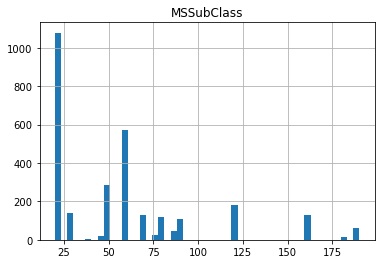

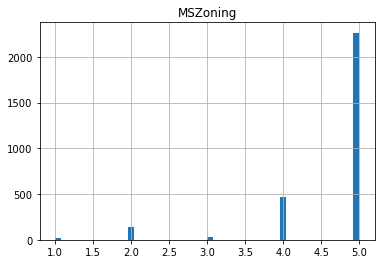

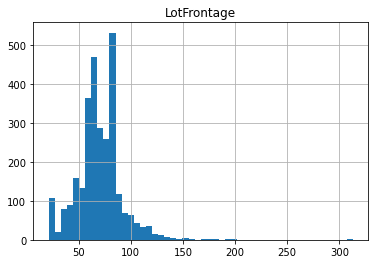

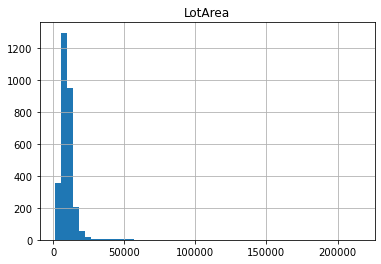

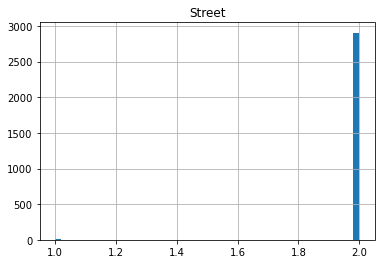

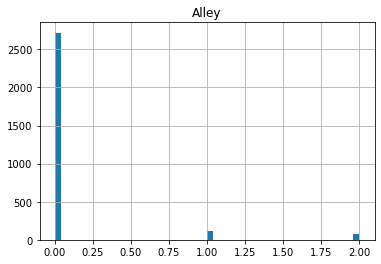

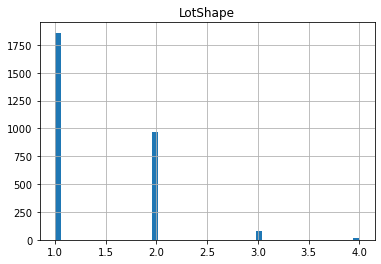

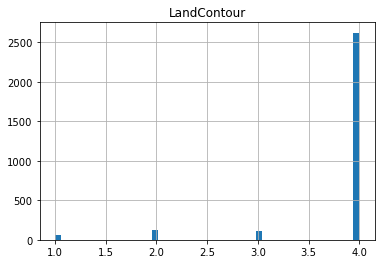

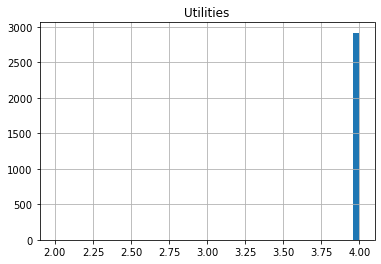

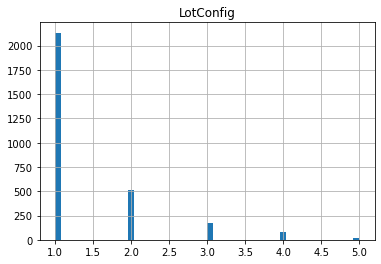

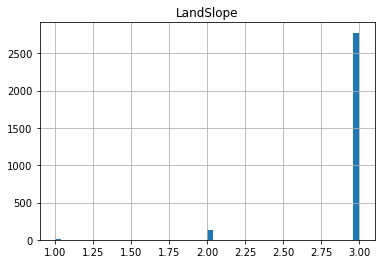

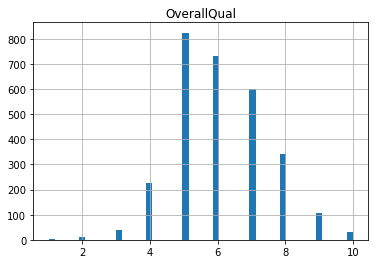

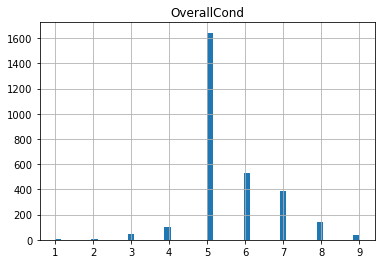

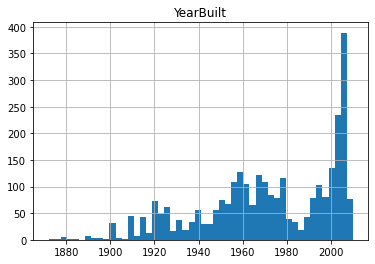

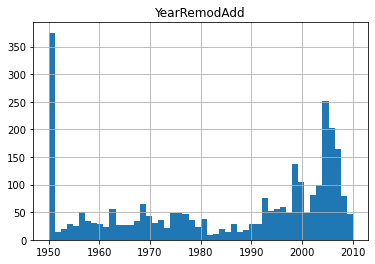

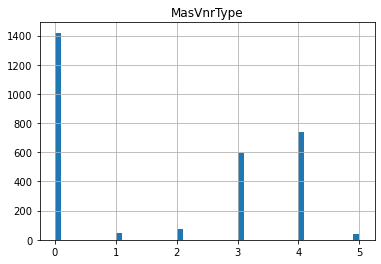

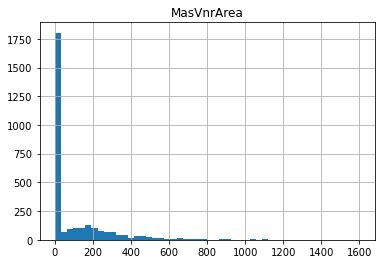

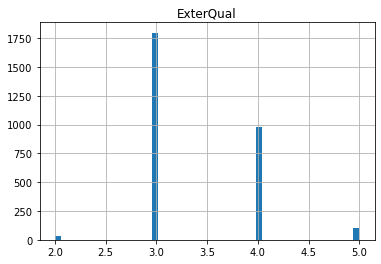

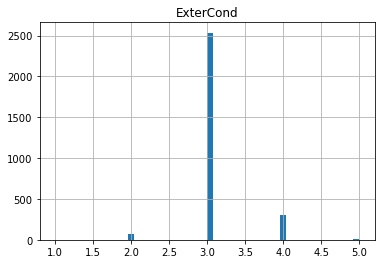

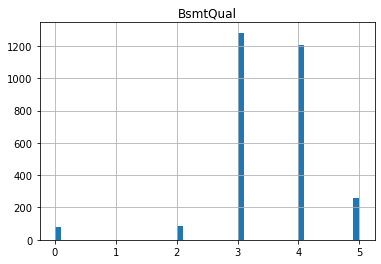

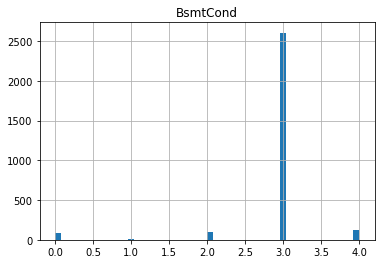

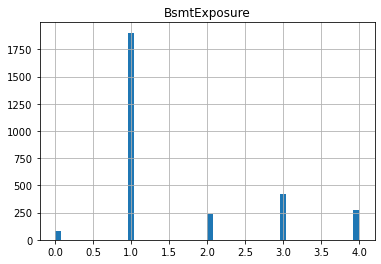

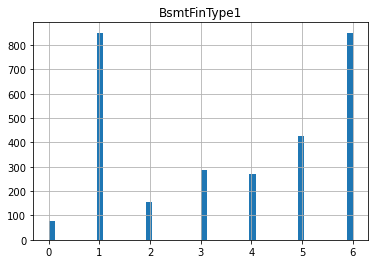

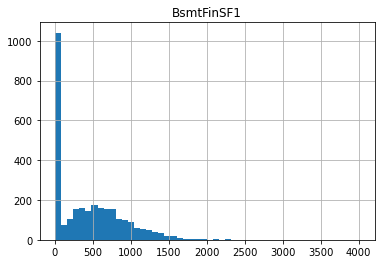

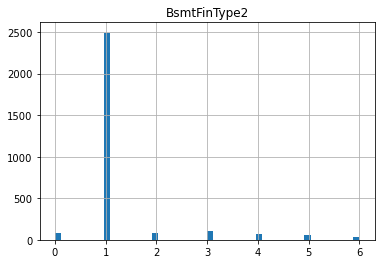

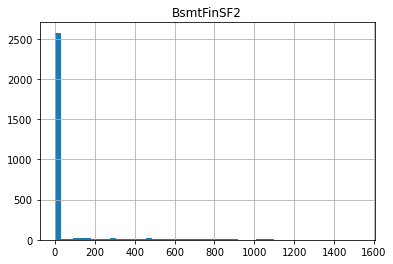

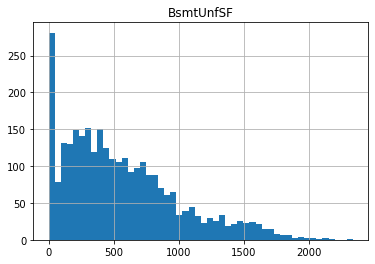

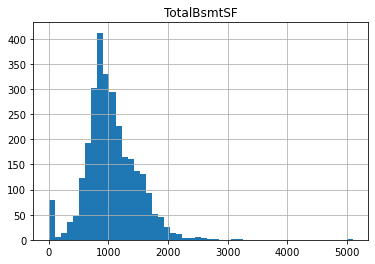

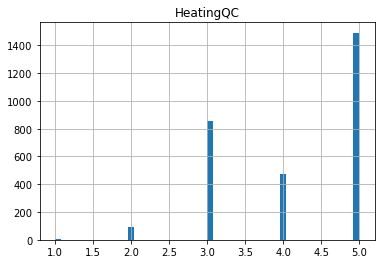

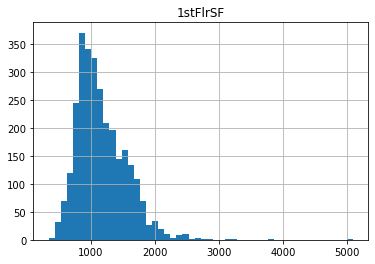

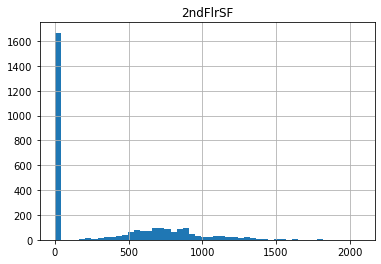

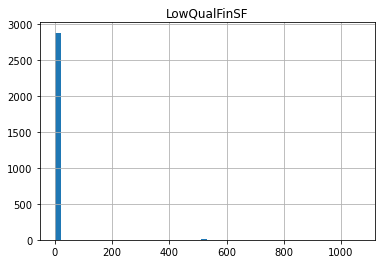

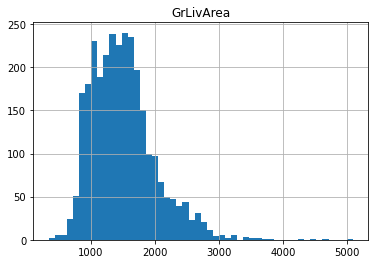

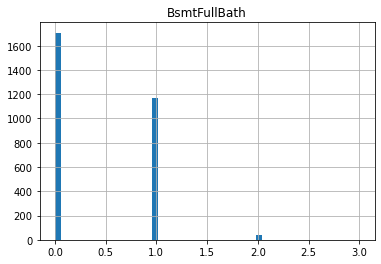

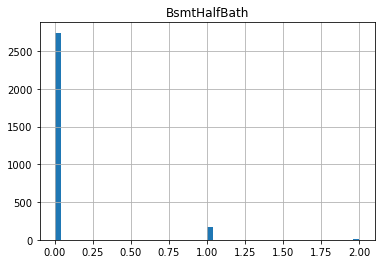

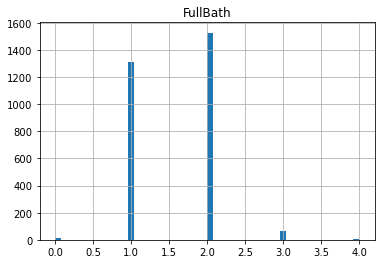

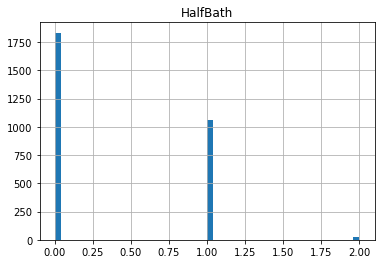

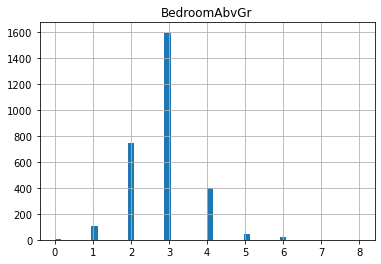

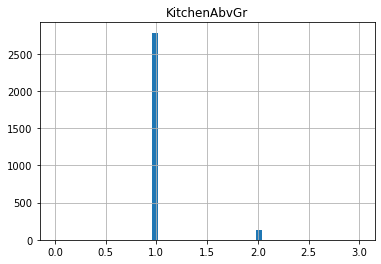

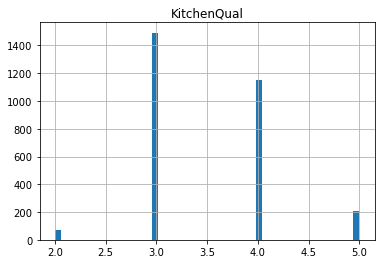

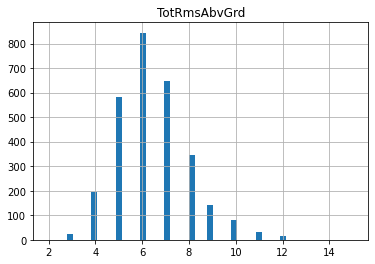

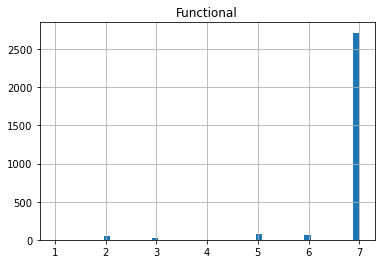

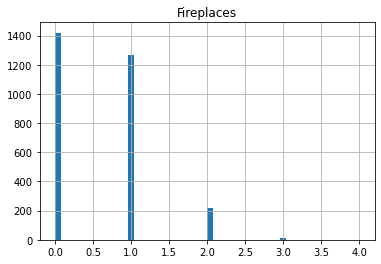

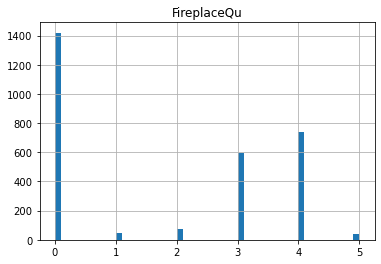

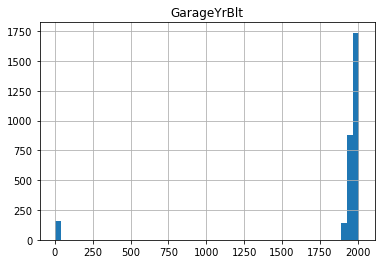

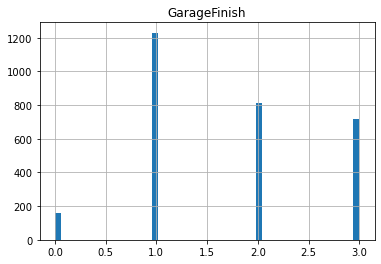

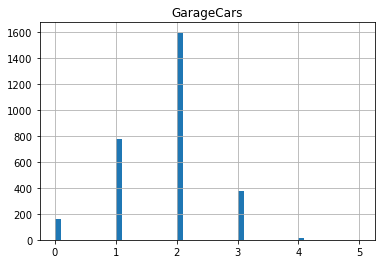

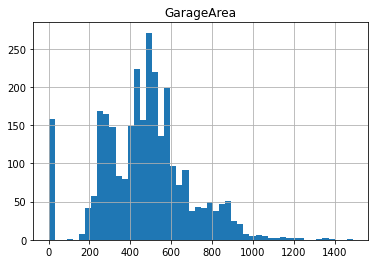

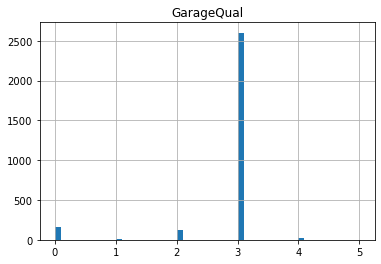

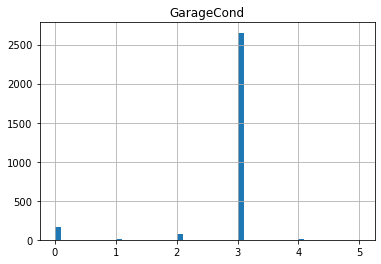

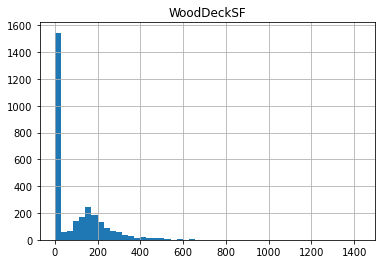

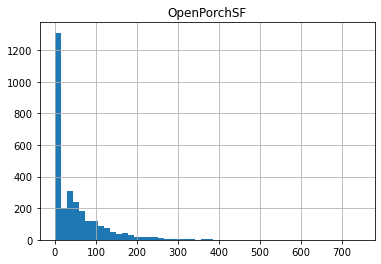

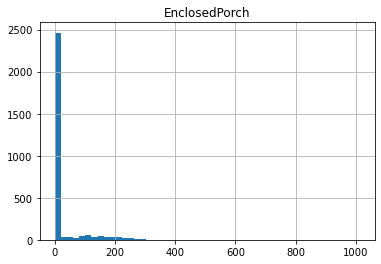

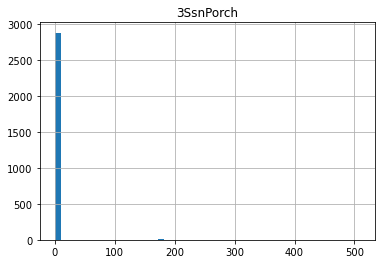

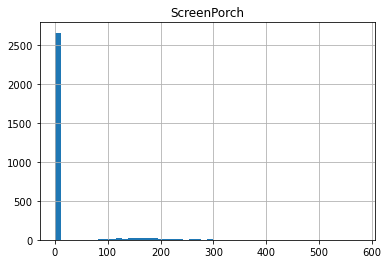

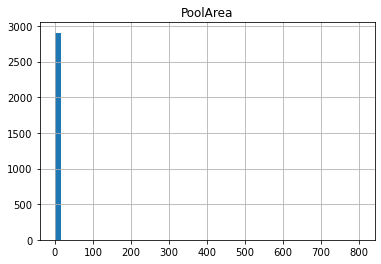

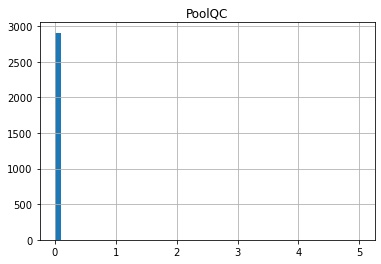

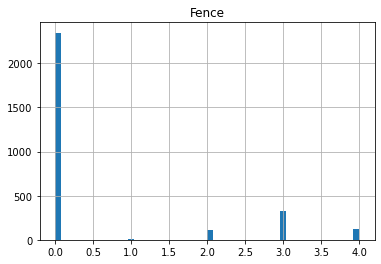

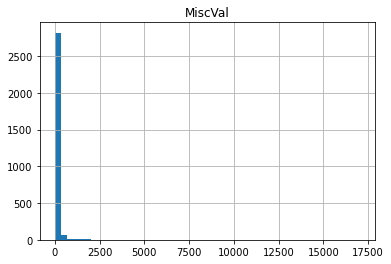

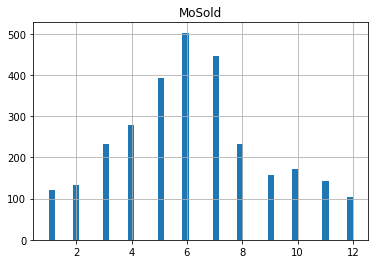

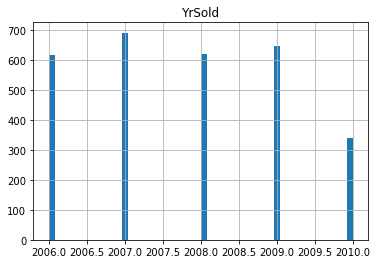

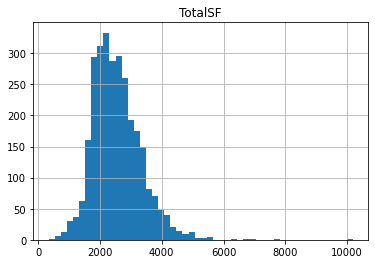

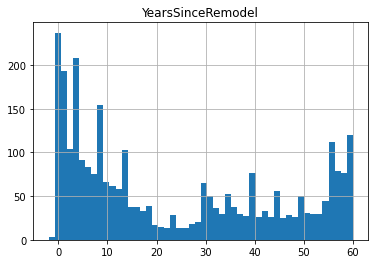

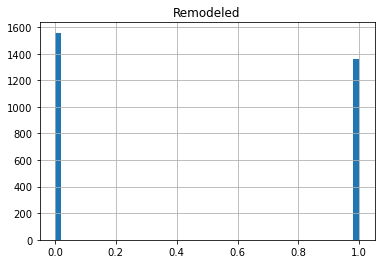

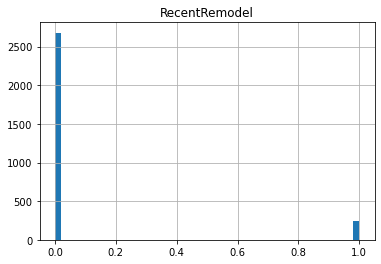

In [875]:
for i, feature in enumerate(numeric.columns):
#     print(feature)
    plt.figure(i)
    plt.title(feature)
    df[feature].hist(bins=50)
#     plt.axvline(x= value_of_outliers(feature) , color='r')

#     (np.log1p(df[feature])).hist(bins = 50)

In [987]:
outliers = df[(df.LotFrontage > 250) | (df.LotArea > 100000) | (df.MasVnrArea > 1400) | (df.BsmtFinSF1 > 3000) | 
   (df.TotalBsmtSF > 4500) | (df['1stFlrSF'] > 4000) | (df.WoodDeckSF > 1000) | (df.OpenPorchSF > 600) |
  (df.EnclosedPorch > 600) | (df.ScreenPorch > 500) | (df.MiscVal> 12500) | (df.TotalSF > 9000)].index
outliers = outliers[outliers< 1460]

In [988]:
outliers

Int64Index([250, 298, 314, 336, 347, 707, 935, 1299], dtype='int64', name='Id')

In [883]:
df.loc[347]

MSSubClass               20
MSZoning                  5
LotFrontage            80.0
LotArea               12772
Street                    2
                      ...  
YearsSinceRemodel         9
Remodeled                 1
RecentRemodel             0
ConstructArea        2217.0
TotalPorchSF              0
Name: 347, Length: 88, dtype: object

In [884]:
df.LotArea.describe()

count      2917.000000
mean      10096.735687
std        7284.748925
min        1300.000000
25%        7476.000000
50%        9452.000000
75%       11556.000000
max      215245.000000
Name: LotArea, dtype: float64

<AxesSubplot:>

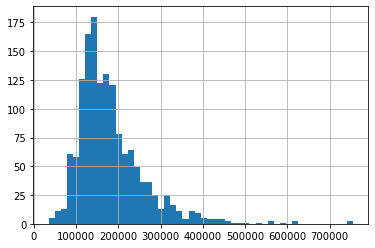

In [207]:
y.hist(bins=50)

In [152]:
df[df.EnclosedPorch > 550].index

Int64Index([198, 2504, 2568], dtype='int64', name='Id')

In [138]:
df[df['2FlrSF'] > 2000].index.values

array([1183])

In [989]:
df = df.drop(outliers, axis=0)

In [658]:
# df = df.drop(['SalePrice'], axis=1)

## Fix skewness

<AxesSubplot:>

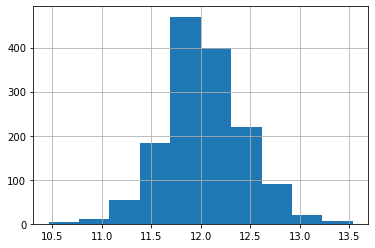

In [990]:
y = np.log1p(y)
y.hist()

In [991]:
from scipy.stats import norm, skew

In [992]:
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.7]
high_skew.head(50)

MiscVal              23.364557
PoolQC               19.528606
PoolArea             17.670290
LowQualFinSF         12.071863
3SsnPorch            11.360117
KitchenAbvGr          4.295433
BsmtFinSF2            4.157618
Alley                 4.146986
EnclosedPorch         3.997699
ScreenPorch           3.953436
BsmtHalfBath          3.939684
LotArea               3.599715
BsmtFinType2          3.160428
RecentRemodel         3.061263
OpenPorchSF           2.537602
MasVnrArea            2.517533
LotConfig             2.132372
WoodDeckSF            1.835928
Fence                 1.750436
Neighborhood_Good     1.527648
TotalPorchSF          1.379601
MSSubClass            1.372688
ExterCond             1.314260
1stFlrSF              1.287039
LotShape              1.235164
ConstructArea         1.141828
GrLivArea             1.133840
BsmtExposure          1.123442
TotalSF               1.087070
BsmtFinSF1            0.996357
BsmtUnfSF             0.916974
2ndFlrSF              0.862443
ExterQua

In [826]:
# highest_skew = skewed_feats[abs(skewed_feats) > 17].index
# df = df.drop(highest_skew, axis=1)

In [993]:
for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


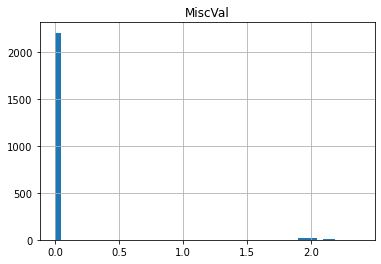

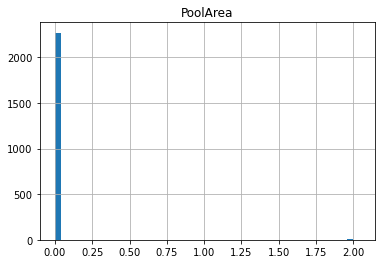

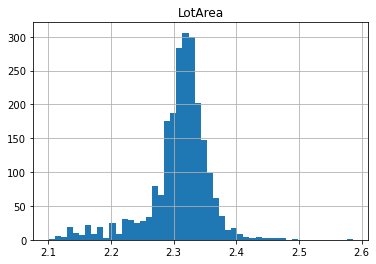

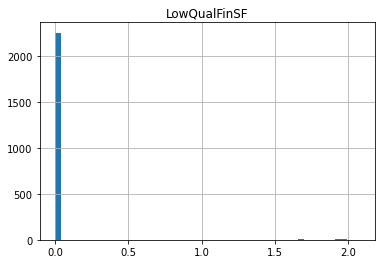

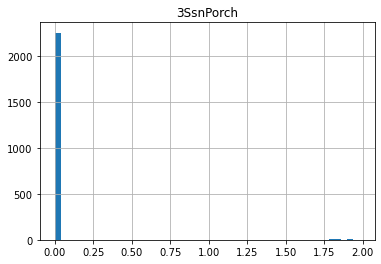

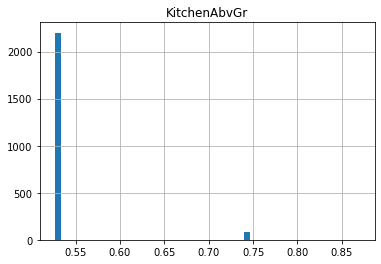

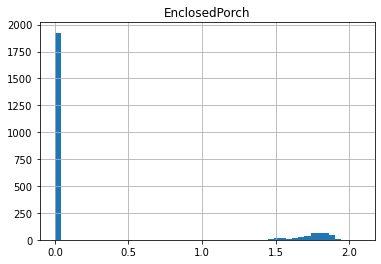

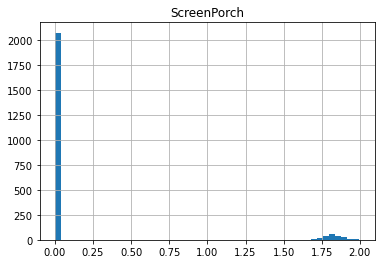

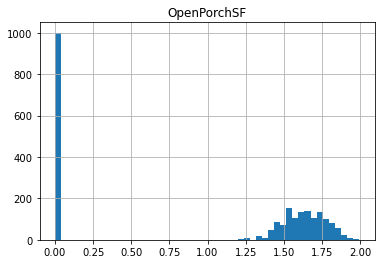

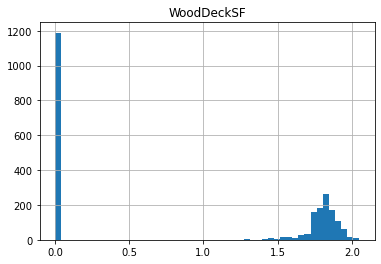

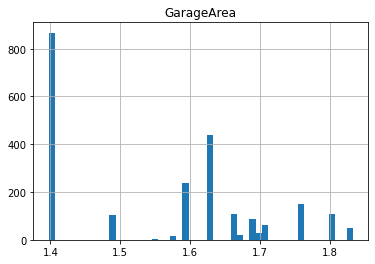

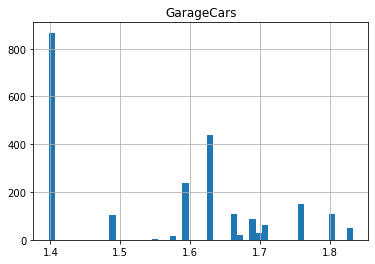

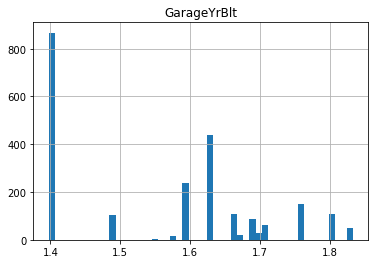

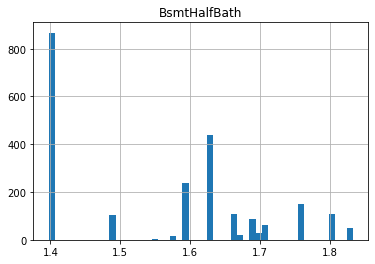

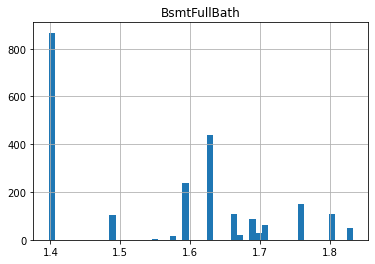

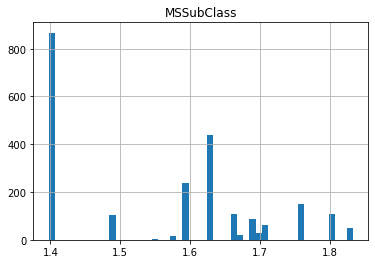

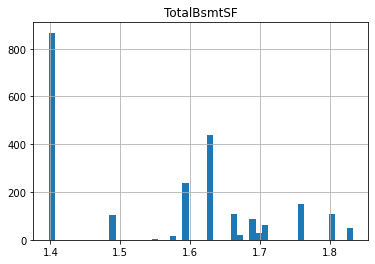

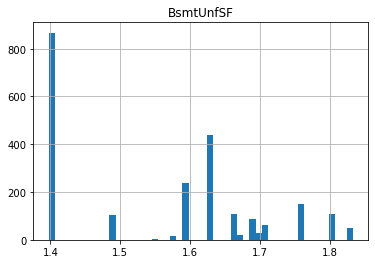

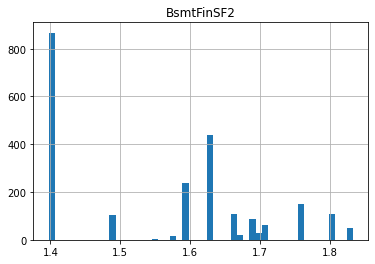

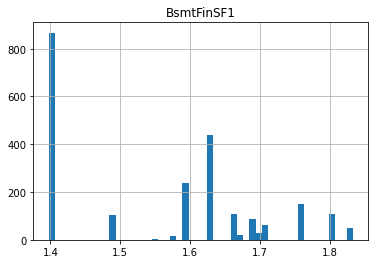

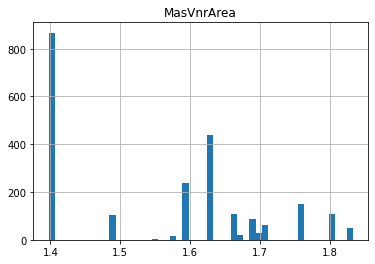

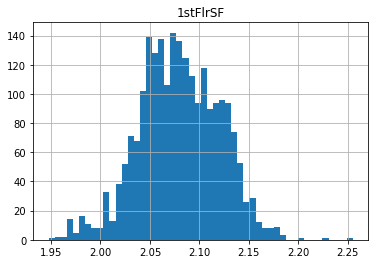

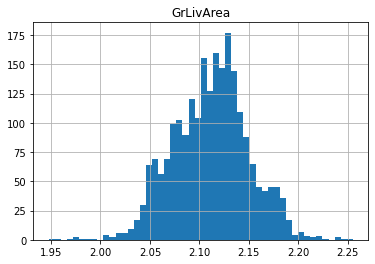

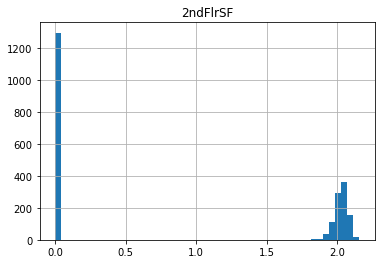

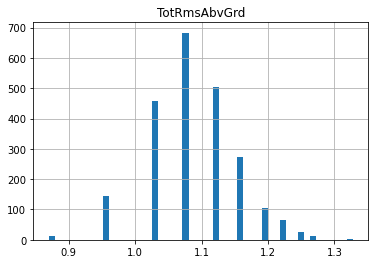

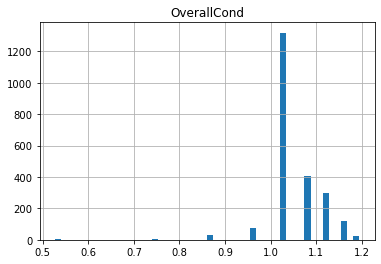

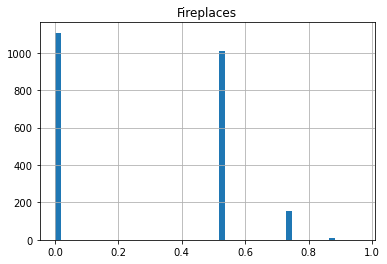

In [35]:
# for i, feature in enumerate(high_skew.index):
#     plt.figure(i)
#     plt.title(feature)
#     (np.log1p(df[feature])).hist(bins = 50)
#     (df[feature]).hist(bins = 50, density = False)

# for feature in high_skew[:5].index:
#     matplotlib.pyplot.subplot(nrows, ncols, r) 
#     plt.hist() 
    
#     (np.log1p(df[feature])).hist()

### Delete variables with low correlation with the price

In [43]:
corr = df.corrwith(y)#["SalePrice"]

In [44]:
corr[abs(corr) < 0.05]

MSSubClass     -0.020279
OverallCond    -0.036868
BsmtFinSF2     -0.030361
BsmtHalfBath   -0.004890
YrSold         -0.037263
dtype: float64

In [45]:
low_corr = corr[abs(corr) < 0.05].index#["LowQualFinSF", "MiscVal", "YrSold", "OverallCond"]

In [46]:
df = df.drop(low_corr, axis=1)

## Adding categorical columns

In [994]:
df = pd.get_dummies(df)


In [995]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,4.110874,1.791759,65.0,9.042040,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
2,3.044522,1.791759,80.0,9.169623,1.098612,0.0,0.693147,1.609438,1.609438,1.609438,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,1.791759,68.0,9.328212,1.098612,0.0,1.098612,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
4,4.262680,1.791759,60.0,9.164401,1.098612,0.0,1.098612,1.609438,1.609438,1.098612,...,0,0,0,1,1,0,0,0,0,0
5,4.110874,1.791759,84.0,9.565284,1.098612,0.0,1.098612,1.609438,1.609438,1.609438,...,0,0,0,1,0,0,0,0,1,0


### Divide into train and test

In [996]:
train = df[:len(train_data)-len(outliers)]
test = df[len(train_data)-len(outliers):]

In [997]:
print(train.shape, test.shape, train_data.shape)

(1452, 218) (1459, 218) (1460, 80)


In [998]:
X = train

In [999]:
y = y.drop(outliers)

In [803]:
# y = train_data.SalePrice
# X = train_data.drop(["SalePrice"], axis=1)
# X = pd.get_dummies(X)

## Training

In [1000]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1001]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1044,4.110874,1.791759,86.0,9.379239,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
1132,3.044522,1.791759,63.0,9.279213,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,1,0,1,0,0,0,0,0
1005,4.795791,1.791759,43.0,8.065579,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
1325,3.044522,1.791759,75.0,9.209040,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,1,0,0,0,0,0,0,0,1
535,4.110874,1.791759,74.0,9.111293,1.098612,0.0,1.098612,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0


In [1002]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [1003]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction_rf = rf.predict(X_test)


In [1004]:
from catboost import CatBoostRegressor

In [1005]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

Learning rate set to 0.038833
0:	learn: 0.3868212	total: 7.03ms	remaining: 7.03s
1:	learn: 0.3769486	total: 12.3ms	remaining: 6.13s
2:	learn: 0.3680312	total: 17.9ms	remaining: 5.93s
3:	learn: 0.3587980	total: 23.6ms	remaining: 5.87s
4:	learn: 0.3494601	total: 28.6ms	remaining: 5.69s
5:	learn: 0.3412289	total: 35.5ms	remaining: 5.88s
6:	learn: 0.3326783	total: 40.9ms	remaining: 5.8s
7:	learn: 0.3244995	total: 46.4ms	remaining: 5.76s
8:	learn: 0.3169576	total: 51.5ms	remaining: 5.67s
9:	learn: 0.3100234	total: 55.4ms	remaining: 5.48s
10:	learn: 0.3024176	total: 63.7ms	remaining: 5.72s
11:	learn: 0.2955971	total: 68ms	remaining: 5.6s
12:	learn: 0.2892909	total: 72.1ms	remaining: 5.47s
13:	learn: 0.2823531	total: 76.1ms	remaining: 5.36s
14:	learn: 0.2764851	total: 79.7ms	remaining: 5.23s
15:	learn: 0.2712968	total: 83.3ms	remaining: 5.12s
16:	learn: 0.2656038	total: 86.9ms	remaining: 5.03s
17:	learn: 0.2600061	total: 90.7ms	remaining: 4.95s
18:	learn: 0.2547254	total: 94.4ms	remaining: 4.

188:	learn: 0.0955988	total: 949ms	remaining: 4.07s
189:	learn: 0.0954047	total: 953ms	remaining: 4.06s
190:	learn: 0.0952529	total: 957ms	remaining: 4.05s
191:	learn: 0.0950462	total: 961ms	remaining: 4.04s
192:	learn: 0.0948596	total: 964ms	remaining: 4.03s
193:	learn: 0.0947595	total: 969ms	remaining: 4.02s
194:	learn: 0.0946465	total: 974ms	remaining: 4.02s
195:	learn: 0.0944345	total: 979ms	remaining: 4.01s
196:	learn: 0.0943134	total: 984ms	remaining: 4.01s
197:	learn: 0.0940125	total: 988ms	remaining: 4s
198:	learn: 0.0939287	total: 993ms	remaining: 4s
199:	learn: 0.0937293	total: 1000ms	remaining: 4s
200:	learn: 0.0935237	total: 1.01s	remaining: 4.01s
201:	learn: 0.0933692	total: 1.03s	remaining: 4.06s
202:	learn: 0.0932351	total: 1.04s	remaining: 4.08s
203:	learn: 0.0931309	total: 1.04s	remaining: 4.07s
204:	learn: 0.0930462	total: 1.04s	remaining: 4.06s
205:	learn: 0.0929787	total: 1.05s	remaining: 4.05s
206:	learn: 0.0926923	total: 1.05s	remaining: 4.04s
207:	learn: 0.092445

376:	learn: 0.0699261	total: 1.9s	remaining: 3.13s
377:	learn: 0.0697699	total: 1.9s	remaining: 3.13s
378:	learn: 0.0696412	total: 1.91s	remaining: 3.13s
379:	learn: 0.0694698	total: 1.91s	remaining: 3.12s
380:	learn: 0.0693635	total: 1.92s	remaining: 3.12s
381:	learn: 0.0692906	total: 1.93s	remaining: 3.11s
382:	learn: 0.0692194	total: 1.93s	remaining: 3.11s
383:	learn: 0.0690776	total: 1.94s	remaining: 3.11s
384:	learn: 0.0689346	total: 1.94s	remaining: 3.1s
385:	learn: 0.0688586	total: 1.95s	remaining: 3.1s
386:	learn: 0.0687633	total: 1.95s	remaining: 3.09s
387:	learn: 0.0687161	total: 1.96s	remaining: 3.09s
388:	learn: 0.0686200	total: 1.96s	remaining: 3.08s
389:	learn: 0.0685965	total: 1.97s	remaining: 3.08s
390:	learn: 0.0685422	total: 1.97s	remaining: 3.07s
391:	learn: 0.0684640	total: 1.98s	remaining: 3.06s
392:	learn: 0.0683214	total: 1.98s	remaining: 3.06s
393:	learn: 0.0681880	total: 1.98s	remaining: 3.05s
394:	learn: 0.0680391	total: 1.99s	remaining: 3.05s
395:	learn: 0.06

561:	learn: 0.0539400	total: 2.66s	remaining: 2.08s
562:	learn: 0.0538700	total: 2.67s	remaining: 2.07s
563:	learn: 0.0538030	total: 2.67s	remaining: 2.07s
564:	learn: 0.0537727	total: 2.68s	remaining: 2.06s
565:	learn: 0.0536967	total: 2.68s	remaining: 2.06s
566:	learn: 0.0535960	total: 2.69s	remaining: 2.05s
567:	learn: 0.0535182	total: 2.69s	remaining: 2.05s
568:	learn: 0.0534069	total: 2.7s	remaining: 2.04s
569:	learn: 0.0533320	total: 2.7s	remaining: 2.04s
570:	learn: 0.0532425	total: 2.71s	remaining: 2.03s
571:	learn: 0.0531783	total: 2.71s	remaining: 2.03s
572:	learn: 0.0530687	total: 2.71s	remaining: 2.02s
573:	learn: 0.0529878	total: 2.72s	remaining: 2.02s
574:	learn: 0.0529699	total: 2.72s	remaining: 2.01s
575:	learn: 0.0528785	total: 2.73s	remaining: 2.01s
576:	learn: 0.0528076	total: 2.73s	remaining: 2s
577:	learn: 0.0527415	total: 2.73s	remaining: 2s
578:	learn: 0.0526648	total: 2.74s	remaining: 1.99s
579:	learn: 0.0525264	total: 2.74s	remaining: 1.99s
580:	learn: 0.052468

740:	learn: 0.0423877	total: 3.42s	remaining: 1.2s
741:	learn: 0.0423306	total: 3.43s	remaining: 1.19s
742:	learn: 0.0422390	total: 3.43s	remaining: 1.19s
743:	learn: 0.0421773	total: 3.44s	remaining: 1.18s
744:	learn: 0.0421673	total: 3.44s	remaining: 1.18s
745:	learn: 0.0421108	total: 3.45s	remaining: 1.17s
746:	learn: 0.0420474	total: 3.45s	remaining: 1.17s
747:	learn: 0.0419856	total: 3.46s	remaining: 1.17s
748:	learn: 0.0419757	total: 3.46s	remaining: 1.16s
749:	learn: 0.0419189	total: 3.47s	remaining: 1.16s
750:	learn: 0.0418703	total: 3.47s	remaining: 1.15s
751:	learn: 0.0417792	total: 3.48s	remaining: 1.15s
752:	learn: 0.0417484	total: 3.48s	remaining: 1.14s
753:	learn: 0.0417191	total: 3.48s	remaining: 1.14s
754:	learn: 0.0416691	total: 3.49s	remaining: 1.13s
755:	learn: 0.0416622	total: 3.49s	remaining: 1.13s
756:	learn: 0.0415778	total: 3.5s	remaining: 1.12s
757:	learn: 0.0414923	total: 3.5s	remaining: 1.12s
758:	learn: 0.0414302	total: 3.5s	remaining: 1.11s
759:	learn: 0.04

914:	learn: 0.0339721	total: 4.18s	remaining: 388ms
915:	learn: 0.0339345	total: 4.18s	remaining: 384ms
916:	learn: 0.0339292	total: 4.19s	remaining: 379ms
917:	learn: 0.0339260	total: 4.2s	remaining: 375ms
918:	learn: 0.0338798	total: 4.2s	remaining: 370ms
919:	learn: 0.0338054	total: 4.21s	remaining: 366ms
920:	learn: 0.0337617	total: 4.21s	remaining: 361ms
921:	learn: 0.0337206	total: 4.22s	remaining: 357ms
922:	learn: 0.0336804	total: 4.22s	remaining: 352ms
923:	learn: 0.0336340	total: 4.23s	remaining: 348ms
924:	learn: 0.0335867	total: 4.24s	remaining: 343ms
925:	learn: 0.0335413	total: 4.24s	remaining: 339ms
926:	learn: 0.0335368	total: 4.25s	remaining: 334ms
927:	learn: 0.0335068	total: 4.25s	remaining: 330ms
928:	learn: 0.0334782	total: 4.26s	remaining: 326ms
929:	learn: 0.0334380	total: 4.27s	remaining: 321ms
930:	learn: 0.0334089	total: 4.27s	remaining: 317ms
931:	learn: 0.0333821	total: 4.28s	remaining: 312ms
932:	learn: 0.0333460	total: 4.29s	remaining: 308ms
933:	learn: 0.

In [1006]:
prediction_cb = catboost.predict(X_test)

In [1007]:
from xgboost import XGBRegressor
import xgboost as xgb

xgbr = xgb.XGBRegressor()

In [1008]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1009]:
prediction_xgbr = xgbr.predict(X_test)

## Choosing the best parametres 

### CatBoost

In [1010]:
from sklearn.model_selection import RandomizedSearchCV
catM = CatBoostRegressor(verbose=0, allow_writing_files=False)
params = {'learning_rate': [0.05, 0.005, 0.0005],
          'depth': [4, 5, 6, 7, 8],
          'l2_leaf_reg': [5,6, 9]}

In [1011]:
grid_search_cat = RandomizedSearchCV(estimator=catM, scoring='neg_root_mean_squared_error', param_distributions=params, n_iter=10, cv=4, verbose=2,
                                 random_state=42, n_jobs=-1)
grid_search_cat.fit(X_train, y_train)
catModel = grid_search_cat.best_estimator_
print('Best params(CatBoost):',grid_search_cat.best_params_)
print('RMSE(CatBoost):', -grid_search_cat.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.6min finished


Best params(CatBoost): {'learning_rate': 0.05, 'l2_leaf_reg': 6, 'depth': 5}
RMSE(CatBoost): 0.12208945941714386


In [1012]:
#catModel = catBoost(X_train, y_train, X_test)
# catModel = CatBoostRegressor(verbose=0, allow_writing_files=False, learning_rate=0.05, l2_leaf_reg=2, depth=4)


In [1013]:
catModel.fit(X_train, y_train)
prediction_cb_best = catModel.predict(X_test)

### XGBoost

In [508]:
params = {'learning_rate': [0.02], 'n_estimators' : [2000], 'max_depth':[3], 
          'colsample_bytree' : [0.4], 'subsample' : [0.7]}

In [509]:
xgbr_reg = GridSearchCV(xgbr, params, cv = 5, n_jobs =1)
xgbr_reg.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [510]:
print("Best params:{}".format(xgbr_reg.best_params_))

best_x = xgbr_reg.best_estimator_
y_train_pred_x = best_x.predict(X_train)
y_val_pred_x = best_x.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_log_error(y_train, y_train_pred_x))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_log_error(y_test, y_val_pred_x)))) 

Best params:{'colsample_bytree': 0.4, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.7}
Root Mean Square Error train = 0.0030053972778739885
Root Mean Square Error test = 0.010086346462917922


In [511]:
prediction_xgbr_best = best_x.predict(X_test)

### Calculate error

In [504]:
from sklearn.metrics import mean_squared_log_error


In [1014]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_rf)))

0.13478919185348978

In [1015]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb)))

0.11697264589107612

In [1016]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb_best)))

0.1158708513282788

In [1017]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_xgbr)))

0.14431521511909834

In [512]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_xgbr_best)))

0.12941922196913147

In [517]:
# mixed_prediction = 0.3* prediction_cb + 0.6 * prediction_cb_best + 0.1*prediction_xgbr_best
mixed_prediction = 0.9 * prediction_cb_best + 0.1*prediction_xgbr_best

In [518]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(mixed_prediction)))

0.1241494004144555

In [82]:
y_test

Id
893     11.947956
1106    12.691584
414     11.652696
523     11.976666
1037    12.661917
          ...    
1011    11.813037
391     11.686887
1410    12.278398
848     11.801864
1285    12.037660
Name: SalePrice, Length: 482, dtype: float64

## Make prediction

In [763]:
y_pred = catModel.predict(test)
# y_pred = catboost.predict(test)

In [764]:
y_pred

array([11.70286384, 12.02871751, 12.11700635, ..., 11.98214621,
       11.63605047, 12.30284157])

In [765]:
tmp = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
tmp['SalePrice'] = np.expm1(y_pred)

In [766]:
y_pred.shape

(1459,)

In [767]:
pred_df = tmp[['Id', 'SalePrice']]
pred_df.set_index('Id', inplace=True)

In [768]:
pred_df

,SalePrice
Id,
1461,120916.507483
1462,167495.462816
1463,182955.985594
1464,198050.783972
1465,190343.599325
...,...
2915,80520.852447
2916,86344.462317
2917,159873.788282


In [769]:
pred_df.to_csv('out.csv')

In [ ]:
np.sqrt(mean_squared_log_error(pred_df.SalePrice, np.expm1(y_pred)))